# СМО

In [1]:
import simpy
import numpy as np
import math
from functools import reduce
import matplotlib.pyplot as plt

import common

## Тестовая функция

In [2]:
def test_queuing_system(n, lambd, mu, test_time, p_bad, r_bad):
    env = simpy.Environment()
    qs = common.QueuingSystem(n, lambd, mu, env, p_bad, r_bad)
    env.process(common.run_queuing_system(qs, env))
    env.run(until=test_time)
    return qs.t_queuing_system_lst, qs.L_queue_lst, qs.t_queue_lst, qs.L_queuing_system_lst, qs.queque_len, qs.r_count, qs.all_count

## Эмпирические характеристики СМО

In [3]:
def get_empirical_characteristic(test_results, n, lambd, mu):
    t_queuing_system_lst, L_queue_lst, t_queue_lst, L_queuing_system_lst, queque_len, r_count, all_count = test_results
    p = []
    for i in range(n + queque_len + 1):
        request_frequency = reduce(lambda count, x: count + 1 if x == i else count, L_queuing_system_lst, 0)
        p.append(request_frequency / len(L_queuing_system_lst))
    Q = 1
    A = lambd * Q
    L_queue = sum(L_queue_lst) / len(L_queue_lst)
    n_occuped = Q * lambd / mu
    L_queuing_system = sum(L_queuing_system_lst) / len(L_queuing_system_lst)
    t_queuing_system = sum(t_queuing_system_lst) / len(t_queuing_system_lst)
    t_queue = sum(t_queue_lst) / len(t_queue_lst)

    r_bad_emp = r_count / all_count
    RQ = A * r_bad_emp

    return p, A, L_queuing_system, L_queue, t_queuing_system, t_queue, n_occuped, RQ

## Теоритические характеристики СМО

In [4]:
def get_p_0(ro, n):
    p_0 = 1

    for i in range(1, n):
        p_0 += (ro ** i) / math.factorial(i)

    p_0 += ((ro ** n) / math.factorial(n)) * (1 / (n - ro))
    p_0 = p_0 ** -1
    return p_0

def get_theoretical_characteristic(n, m, lambd, mu, p_bad, r_bad):
    ro = lambd / mu
    p = []
    p_0 = get_p_0(ro, n)
    p.append(p_0)
    for k in range(1, n + 1):
        p_k = ro ** k / math.factorial(k) * p_0
        p.append(p_k)
    for i in range(1, m + 1):
        p_n_i = ro ** (n + i) * p_0 / (n ** i * math.factorial(n))
        p.append(p_n_i)
    Q = 1
    A = lambd * Q
    L_queue = ro ** (n + 1) / math.factorial(n) * n / (n - ro) ** 2 * p_0
    n_occuped = Q * lambd / mu
    L_queuing_system = ro
    t_queuing_system = L_queuing_system / lambd
    t_queue = L_queue / lambd

    RQ = A * (p_bad * r_bad)

    return p, A, L_queuing_system, L_queue, t_queuing_system, t_queue, n_occuped, RQ

## Тесты

### Тест №1
n=3, $\lambda$=2, $\mu$=1, q = 0.5, R = 0.5

Теоритическое p0:  0.15789473684210528
Теоритическое p1:  0.31578947368421056
Теоритическое p2:  0.31578947368421056
Теоритическое p3:  0.2105263157894737
Теоритическое p4:  0.14035087719298248
Теоритическое p5:  0.09356725146198831
Теоритическое p6:  0.062378167641325546
Теоритическое p7:  0.04158544509421703
Теоритическое p8:  0.027723630062811352
Теоритическое p9:  0.018482420041874236
Теоритическое p10:  0.01232161336124949
Теоритическое p11:  0.00821440890749966
Теоритическое p12:  0.005476272604999773
Теоритическое p13:  0.0036508484033331823
Теоритическое p14:  0.002433898935555455
Теоритическое p15:  0.0016225992903703033
Теоритическое p16:  0.0010817328602468687
Теоритическое p17:  0.0007211552401645792
Теоритическое p18:  0.0004807701601097195
Теоритическое p19:  0.0003205134400731463
Теоритическое p20:  0.00021367562671543088
Теоритическое A (абсолютная пропускная способность):  2
Теоритическое L СМО (среднее число заявок в СМО):  2.0
Теоритическое L очереди (среднее число з

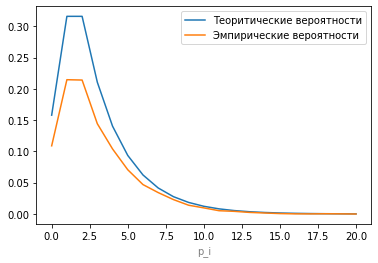

In [5]:
n = 3
lambd = 2
mu = 1
p_bad = 0.5
r_bad = 0.5


test_results = test_queuing_system(n, lambd, mu, 10000, p_bad, r_bad)
empirical_characteristic = get_empirical_characteristic(test_results, n, lambd, mu)
theoretical_characteristic = get_theoretical_characteristic(n, common.get_queque_len_from_results(test_results), lambd, mu, p_bad, r_bad)

common.display(theoretical_characteristic, 'Теоритическое')
common.display(empirical_characteristic, 'Эмпирическое')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)

### Тест №2
n=3, $\lambda$=5, $\mu$=2, q=0.4, R=0.4

Теоритическое p0:  0.08450704225352114
Теоритическое p1:  0.21126760563380284
Теоритическое p2:  0.26408450704225356
Теоритическое p3:  0.22007042253521128
Теоритическое p4:  0.18339201877934275
Теоритическое p5:  0.15282668231611896
Теоритическое p6:  0.1273555685967658
Теоритическое p7:  0.10612964049730483
Теоритическое p8:  0.08844136708108737
Теоритическое p9:  0.07370113923423947
Теоритическое p10:  0.06141761602853289
Теоритическое p11:  0.05118134669044407
Теоритическое p12:  0.042651122242036724
Теоритическое p13:  0.03554260186836394
Теоритическое p14:  0.029618834890303286
Теоритическое p15:  0.02468236240858607
Теоритическое p16:  0.020568635340488393
Теоритическое p17:  0.017140529450406995
Теоритическое p18:  0.014283774542005826
Теоритическое p19:  0.011903145451671523
Теоритическое p20:  0.009919287876392936
Теоритическое p21:  0.008266073230327447
Теоритическое p22:  0.0068883943586062054
Теоритическое p23:  0.005740328632171838
Теоритическое p24:  0.004783607193476531

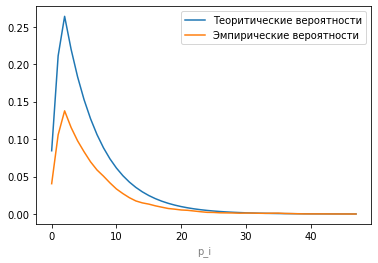

In [6]:
n = 3
lambd = 5
mu = 2
p_bad = 0.4
r_bad = 0.4

test_results = test_queuing_system(n, lambd, mu, 10000, p_bad, r_bad)
empirical_characteristic = get_empirical_characteristic(test_results, n, lambd, mu)
theoretical_characteristic = get_theoretical_characteristic(n, common.get_queque_len_from_results(test_results), lambd, mu, p_bad, r_bad)

common.display(theoretical_characteristic, 'Теоритическое')
common.display(empirical_characteristic, 'Эмпирическое')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)

### Тест №3
n=7, $\lambda$=12, $\mu$=3, q=0.7, R=0.7

Теоритическое p0:  0.02014538787865868
Теоритическое p1:  0.08058155151463472
Теоритическое p2:  0.16116310302926945
Теоритическое p3:  0.21488413737235926
Теоритическое p4:  0.21488413737235926
Теоритическое p5:  0.1719073098978874
Теоритическое p6:  0.11460487326525828
Теоритическое p7:  0.06548849900871902
Теоритическое p8:  0.037421999433553725
Теоритическое p9:  0.021383999676316413
Теоритическое p10:  0.012219428386466521
Теоритическое p11:  0.006982530506552298
Теоритическое p12:  0.003990017432315599
Теоритическое p13:  0.0022800099613231994
Теоритическое p14:  0.0013028628350418281
Теоритическое p15:  0.0007444930485953304
Теоритическое p16:  0.00042542459919733166
Теоритическое p17:  0.00024309977096990382
Теоритическое p18:  0.00013891415483994503
Теоритическое p19:  7.937951705139717e-05
Теоритическое p20:  4.535972402936981e-05
Теоритическое p21:  2.591984230249703e-05
Теоритическое p22:  1.4811338458569733e-05
Теоритическое p23:  8.463621976325561e-06
Теоритическое p24:  

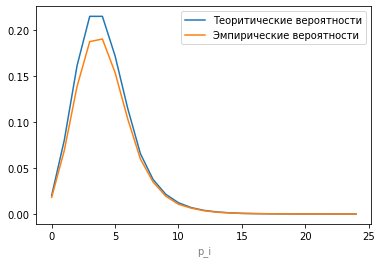

In [8]:
n = 7
lambd = 12
mu = 3
p_bad = 0.2
r_bad = 0.5

test_results = test_queuing_system(n, lambd, mu, 10000, p_bad, r_bad)
empirical_characteristic = get_empirical_characteristic(test_results, n, lambd, mu)
theoretical_characteristic = get_theoretical_characteristic(n, common.get_queque_len_from_results(test_results), lambd, mu, p_bad, r_bad)

common.display(theoretical_characteristic, 'Теоритическое')
common.display(empirical_characteristic, 'Эмпирическое')

t_estimation_lst = theoretical_characteristic[0] + [
    theoretical_characteristic[i] for i in range(1, len(theoretical_characteristic))
]
e_estimation_lst = empirical_characteristic[0] + [
    empirical_characteristic[i] for i in range(1, len(empirical_characteristic))
]

chi2_estimation = common.get_xi_2(e_estimation_lst, t_estimation_lst)
print('Тест хи-квадрат:', chi2_estimation)

common.p_graph(theoretical_characteristic, empirical_characteristic)